# Author: Vishnu Vardhan Putta

# Notebook 3: Decision Tree (CART) for Smoking Prediction

In this notebook, we'll implement and evaluate the Decision Tree (CART - Classification and Regression Trees) algorithm for predicting smoking status based on health indicators. We'll use the cleaned datasets prepared in Notebook 1.

## Understanding Decision Tree Algorithms

Decision Trees are non-parametric supervised learning methods used for classification and regression. They create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### How Decision Trees Work:
1. The algorithm recursively splits the data into subsets based on the feature that provides the best separation of classes
2. Each split aims to increase the homogeneity (purity) of the target variable within the resulting subsets
3. The process continues until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf)
4. The prediction for a new sample is determined by the majority class of the leaf node it ends up in

### Advantages of Decision Trees:
- Easy to understand and interpret (can be visualized)
- Requires little data preparation (no normalization or scaling needed)
- Can handle both numerical and categorical data
- Performs feature selection inherently
- Non-parametric, so they can model complex relationships without assuming a specific functional form

### Limitations of Decision Trees:
- Prone to overfitting, especially with deep trees
- Can create biased trees if some classes dominate
- Can be unstable (small changes in data can result in very different trees)
- May not capture complex relationships that other algorithms can

Let's implement and evaluate a Decision Tree model for our smoking prediction task, optimizing its parameters and comparing performance between full and reduced feature sets.

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set random seed for reproducibility
RANDOM_STATE = 42

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the full and reduced datasets
df_full = pd.read_csv('smoking_cleaned_full.csv')
df_reduced = pd.read_csv('smoking_cleaned_reduced.csv')

# Display basic information about the datasets
print(f"Full dataset shape: {df_full.shape}")
print(f"Reduced dataset shape: {df_reduced.shape}")

# Verify that both datasets have the target variable
print(f"\nTarget variable 'smoking' distribution in full dataset:\n{df_full['smoking'].value_counts()}")
print(f"\nTarget variable 'smoking' distribution in reduced dataset:\n{df_reduced['smoking'].value_counts()}")

Full dataset shape: (44084, 30)
Reduced dataset shape: (44084, 16)

Target variable 'smoking' distribution in full dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64

Target variable 'smoking' distribution in reduced dataset:
smoking
0    27972
1    16112
Name: count, dtype: int64


## 2. Data Preparation

Unlike KNN, Decision Trees do not require feature scaling since they make decisions based on thresholds rather than distances. This is one of the advantages of tree-based methods. Let's prepare our data by separating features and target variables.

In [3]:
# Separate features and target for both datasets
X_full = df_full.drop('smoking', axis=1)
y_full = df_full['smoking']

X_reduced = df_reduced.drop('smoking', axis=1)
y_reduced = df_reduced['smoking']

# Split the data into training and testing sets
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=RANDOM_STATE, stratify=y_full
)

X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=RANDOM_STATE, stratify=y_reduced
)

print("Data preparation completed successfully.")
print(f"Training set size: {X_full_train.shape[0]} samples")
print(f"Testing set size: {X_full_test.shape[0]} samples")
print(f"Full feature set: {X_full.shape[1]} features")
print(f"Reduced feature set: {X_reduced.shape[1]} features")

Data preparation completed successfully.
Training set size: 35267 samples
Testing set size: 8817 samples
Full feature set: 29 features
Reduced feature set: 15 features


## 3. Finding Optimal Decision Tree Parameters

Decision Trees have several important hyperparameters that affect performance:

1. **max_depth**: The maximum depth of the tree. Deeper trees can capture more complex patterns but may overfit.
2. **min_samples_split**: The minimum number of samples required to split an internal node.
3. **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
4. **criterion**: The function used to measure the quality of a split ('gini' for Gini impurity or 'entropy' for information gain).

Let's test different configurations to find the best parameters:

In [4]:
# Test different criteria for decision tree
criteria = ['gini', 'entropy']
max_depths = [5, 10, 15, 20, 25, 30, None]  # None means unlimited depth

# Let's first compare different criteria and max_depths
results = []

print("Finding best decision tree parameters...")
for criterion in criteria:
    for max_depth in max_depths:
        dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=RANDOM_STATE)
        # Use 5-fold cross-validation with F1 score
        scores = cross_val_score(dt, X_reduced_train, y_reduced_train, cv=5, scoring='f1')
        mean_score = scores.mean()
        results.append({
            'criterion': criterion,
            'max_depth': max_depth,
            'f1_score': mean_score
        })
        print(f"Criterion: {criterion}, Max Depth: {max_depth}, F1 Score: {mean_score:.4f}")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the best parameters
best_params = results_df.loc[results_df['f1_score'].idxmax()]
print(f"\nBest parameters: {best_params.to_dict()}")

Finding best decision tree parameters...
Criterion: gini, Max Depth: 5, F1 Score: 0.6651
Criterion: gini, Max Depth: 10, F1 Score: 0.6448
Criterion: gini, Max Depth: 15, F1 Score: 0.6009
Criterion: gini, Max Depth: 20, F1 Score: 0.5771
Criterion: gini, Max Depth: 25, F1 Score: 0.5743
Criterion: gini, Max Depth: 30, F1 Score: 0.5682
Criterion: gini, Max Depth: None, F1 Score: 0.5694
Criterion: entropy, Max Depth: 5, F1 Score: 0.6577
Criterion: entropy, Max Depth: 10, F1 Score: 0.6444
Criterion: entropy, Max Depth: 15, F1 Score: 0.6071
Criterion: entropy, Max Depth: 20, F1 Score: 0.5858
Criterion: entropy, Max Depth: 25, F1 Score: 0.5786
Criterion: entropy, Max Depth: 30, F1 Score: 0.5779
Criterion: entropy, Max Depth: None, F1 Score: 0.5759

Best parameters: {'criterion': 'gini', 'max_depth': 5.0, 'f1_score': 0.6651231192988829}


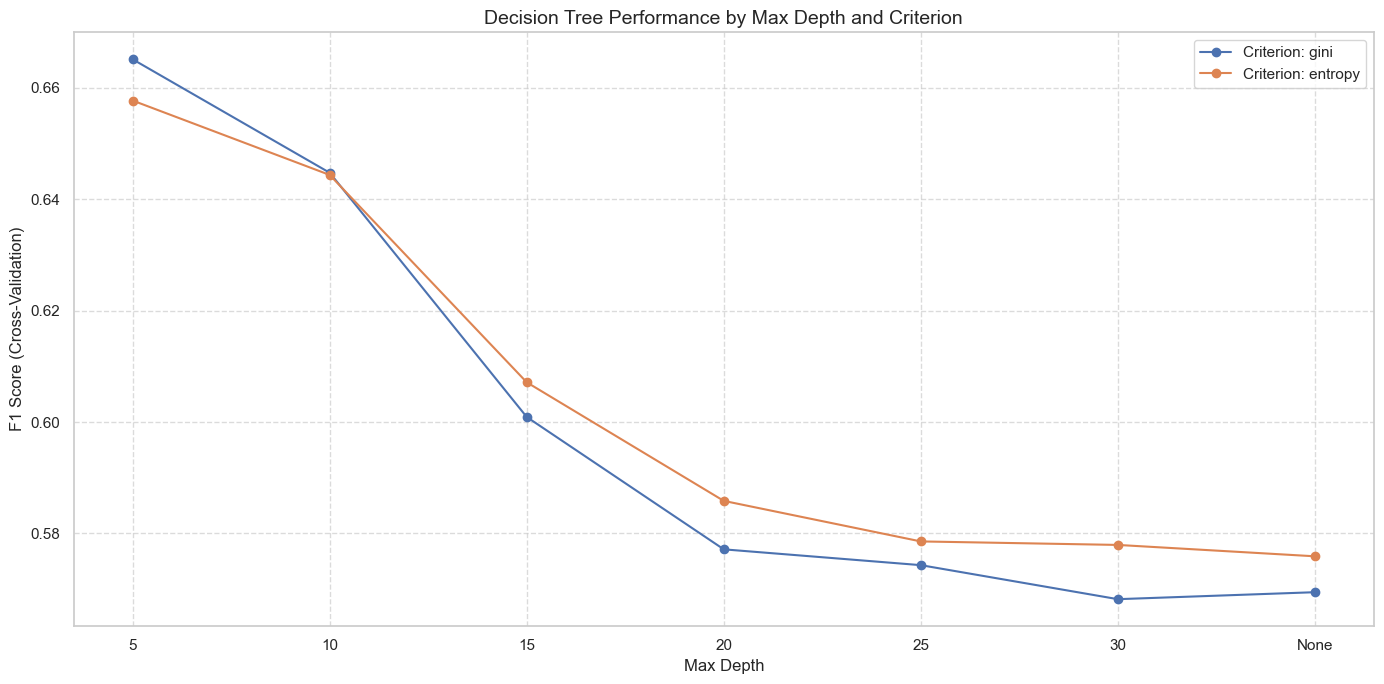

In [5]:
# Visualize the results
plt.figure(figsize=(14, 7))
for criterion in criteria:
    subset = results_df[results_df['criterion'] == criterion]
    plt.plot(
        [str(depth) for depth in max_depths], 
        subset['f1_score'], 
        marker='o', 
        label=f'Criterion: {criterion}'
    )

plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('F1 Score (Cross-Validation)', fontsize=12)
plt.title('Decision Tree Performance by Max Depth and Criterion', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
# Further optimizing with random_state
# Sometimes the random_state can have a significant impact on decision tree performance
# Let's test different random states to find the best one

best_criterion = best_params['criterion']
best_depth = int(best_params['max_depth'])
random_states = range(1, 51)  # Test 50 different random states

print("Finding best random state for decision tree...")
rs_results = []

for rs in random_states:
    dt = DecisionTreeClassifier(
        criterion=best_criterion, 
        max_depth=best_depth, 
        random_state=rs
    )
    dt.fit(X_reduced_train, y_reduced_train)  # Use reduced dataset for speed
    score = dt.score(X_reduced_test, y_reduced_test)
    rs_results.append({
        'random_state': rs,
        'accuracy': score
    })
    # Print progress every 10 states
    if rs % 10 == 0:
        print(f"Tested {rs} random states...")

# Convert to DataFrame
rs_df = pd.DataFrame(rs_results)

# Find the best random state
best_rs = rs_df.loc[rs_df['accuracy'].idxmax(), 'random_state']
print(f"\nBest random state: {best_rs} with accuracy: {rs_df['accuracy'].max():.4f}")

Finding best random state for decision tree...
Tested 10 random states...
Tested 20 random states...
Tested 30 random states...
Tested 40 random states...
Tested 50 random states...

Best random state: 1 with accuracy: 0.7344


## 4. Training Decision Tree Models with Optimal Parameters

Now that we've identified the optimal parameters (criterion, max_depth, and random_state), let's train our final models for both the full and reduced feature sets:

In [8]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, y_prob=None):
    """Calculate and return performance metrics for a classification model."""
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # ROC AUC (if probability predictions are available)
    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

# Train Decision Tree with optimal parameters for full feature set
dt_full = DecisionTreeClassifier(
    criterion=best_criterion, 
    max_depth=best_depth, 
    random_state=best_rs
)
dt_full.fit(X_full_train, y_full_train)

# Train Decision Tree with optimal parameters for reduced feature set
dt_reduced = DecisionTreeClassifier(
    criterion=best_criterion, 
    max_depth=best_depth, 
    random_state=best_rs
)
dt_reduced.fit(X_reduced_train, y_reduced_train)

# Make predictions
y_full_pred = dt_full.predict(X_full_test)
y_reduced_pred = dt_reduced.predict(X_reduced_test)

# Get probability predictions
y_full_prob = dt_full.predict_proba(X_full_test)[:, 1]
y_reduced_prob = dt_reduced.predict_proba(X_reduced_test)[:, 1]

# Evaluate performance
full_metrics = evaluate_model(y_full_test, y_full_pred, y_full_prob)
reduced_metrics = evaluate_model(y_reduced_test, y_reduced_pred, y_reduced_prob)

# Display results
print("\nDecision Tree Model with Full Feature Set:")
print(f"Accuracy: {full_metrics['accuracy']:.4f}")
print(f"Precision: {full_metrics['precision']:.4f}")
print(f"Recall: {full_metrics['recall']:.4f}")
print(f"F1 Score: {full_metrics['f1_score']:.4f}")
print(f"ROC AUC: {full_metrics['roc_auc']:.4f}")

print("\nDecision Tree Model with Reduced Feature Set:")
print(f"Accuracy: {reduced_metrics['accuracy']:.4f}")
print(f"Precision: {reduced_metrics['precision']:.4f}")
print(f"Recall: {reduced_metrics['recall']:.4f}")
print(f"F1 Score: {reduced_metrics['f1_score']:.4f}")
print(f"ROC AUC: {reduced_metrics['roc_auc']:.4f}")


Decision Tree Model with Full Feature Set:
Accuracy: 0.7364
Precision: 0.6197
Recall: 0.7216
F1 Score: 0.6668
ROC AUC: 0.8153

Decision Tree Model with Reduced Feature Set:
Accuracy: 0.7344
Precision: 0.6261
Recall: 0.6782
F1 Score: 0.6511
ROC AUC: 0.8144


## 5. Understanding the Evaluation Metrics

Let's understand what each metric means in the context of our smoking prediction problem:

1. **Accuracy**: The proportion of correct predictions (both smokers and non-smokers correctly identified) out of all predictions. While intuitive, accuracy can be misleading in imbalanced datasets.

2. **Precision**: The proportion of true positive predictions (correctly identified smokers) among all positive predictions. In our context: "When the model predicts someone is a smoker, how often is it right?" High precision means fewer false positives (non-smokers incorrectly classified as smokers).

3. **Recall (Sensitivity)**: The proportion of true positive predictions (correctly identified smokers) among all actual smokers. In our context: "Of all actual smokers, how many did the model correctly identify?" High recall means fewer false negatives (smokers incorrectly classified as non-smokers).

4. **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns. This is particularly useful when you need to balance the trade-off between precision and recall.

5. **ROC AUC**: Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between classes across all possible classification thresholds. Values range from 0.5 (no discriminative power, equivalent to random guessing) to 1.0 (perfect discrimination).

The importance of each metric depends on the specific application:
- In screening scenarios where follow-up tests are costly or invasive, higher precision might be preferred (minimize false positives).
- In public health initiatives aiming to identify as many smokers as possible, higher recall might be prioritized (minimize false negatives).
- For a balanced approach, F1 score and ROC AUC provide good overall assessments of model performance.

## 6. Visualizing the Decision Tree

One of the advantages of decision trees is their interpretability. Let's visualize the first few levels of our trained decision tree to understand how it makes predictions:

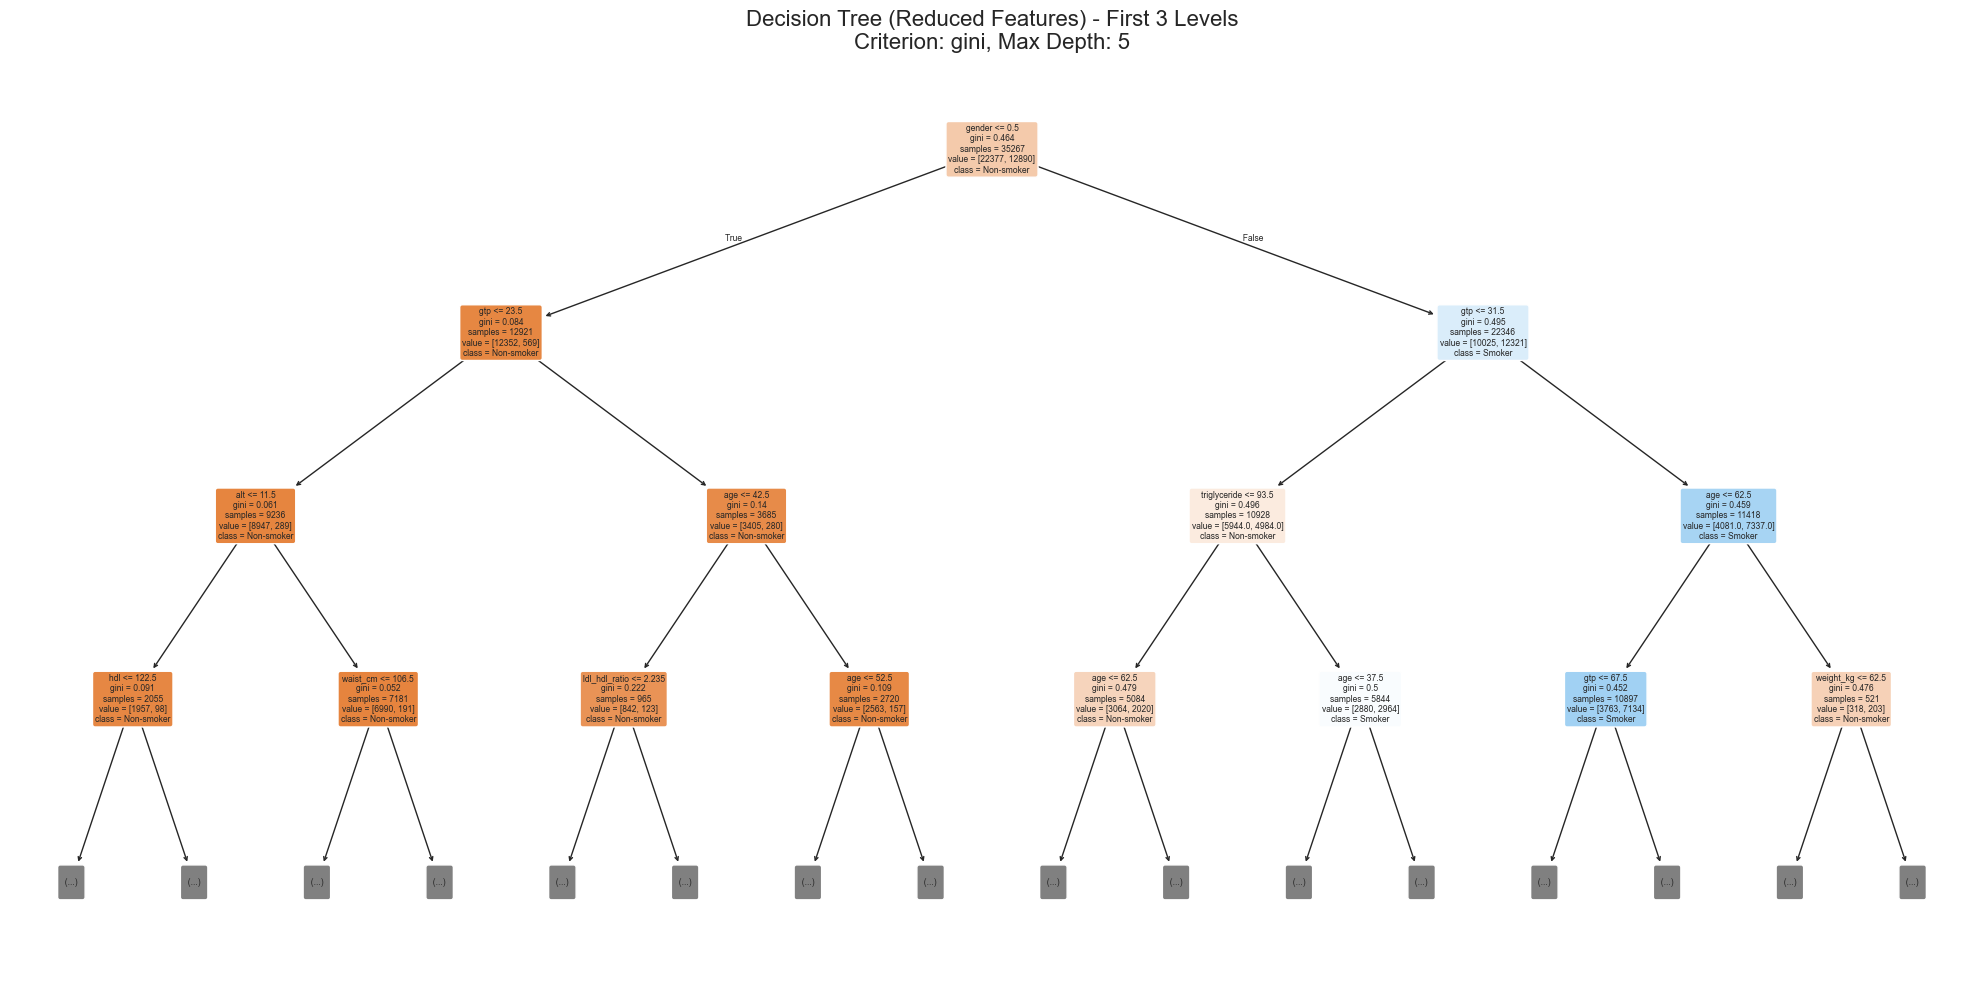

In [11]:
# Visualize the decision tree (reduced model for clarity)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_reduced, 
    feature_names=X_reduced.columns, 
    class_names=['Non-smoker', 'Smoker'],
    filled=True, 
    rounded=True, 
    max_depth=3  # Only show first 3 levels for clarity
)
plt.title(f"Decision Tree (Reduced Features) - First 3 Levels\nCriterion: {best_criterion}, Max Depth: {best_depth}", fontsize=16)
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')  # Save high-resolution image
plt.show()

/var/folders/2n/kd93964174v5lrpxdb4088m40000gp/T/ipykernel_67865/4289158952.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2n/kd93964174v5lrpxdb4088m40000gp/T/ipykernel_67865/4289158952.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


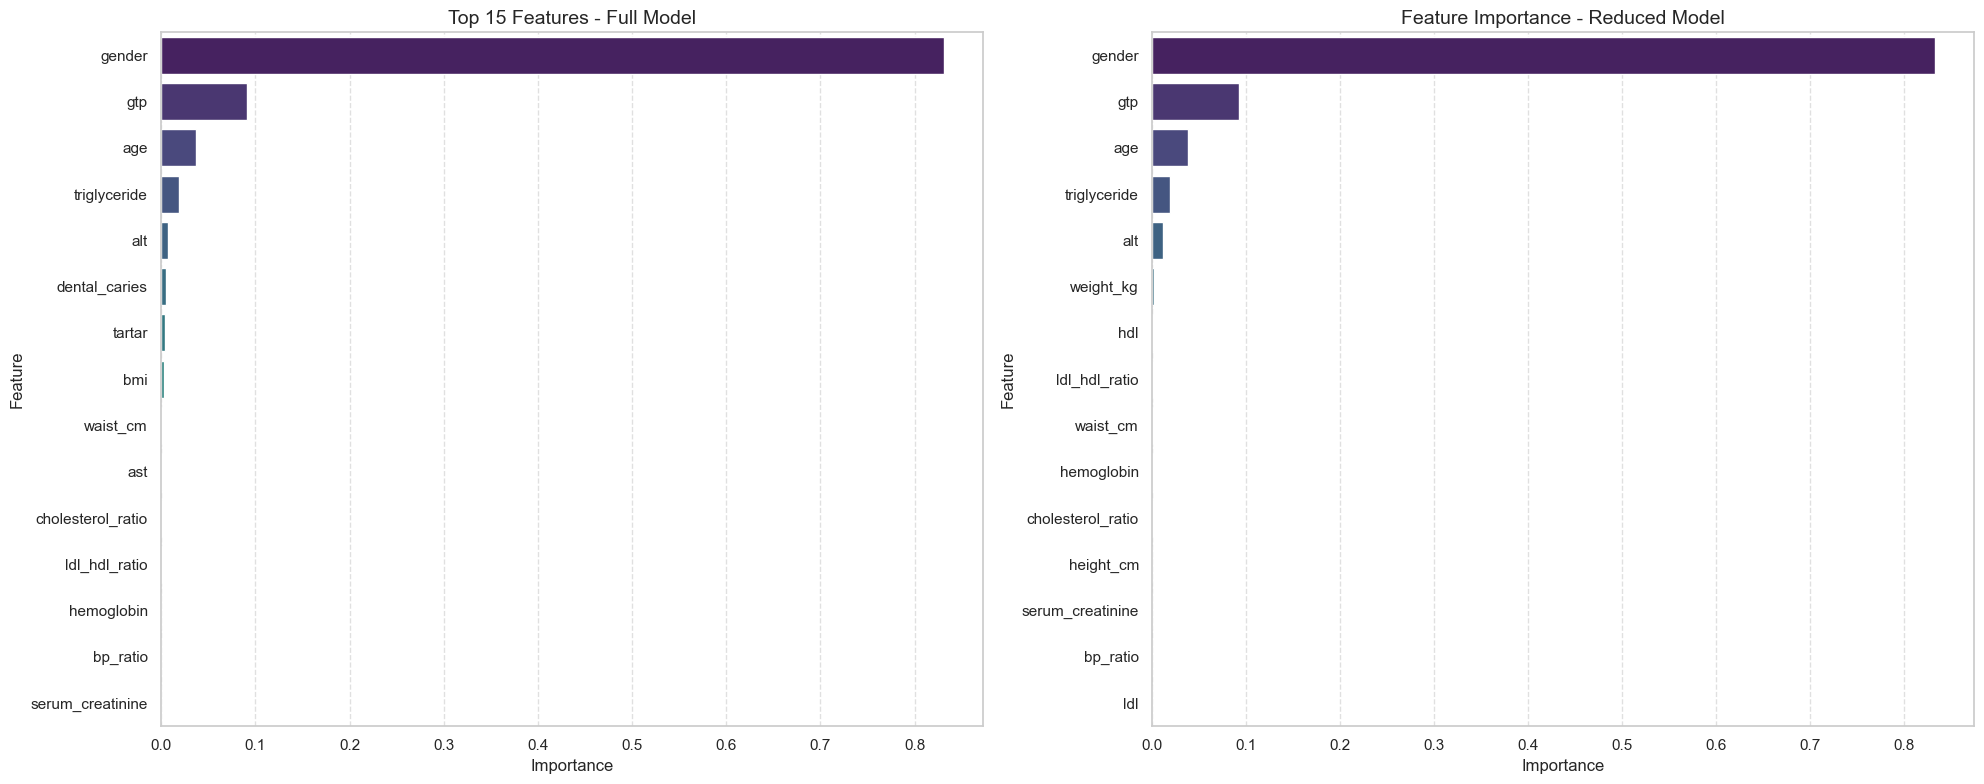

Top 5 Important Features (Full Model):
         Feature  Importance
0         gender    0.831023
21           gtp    0.090808
1            age    0.036528
13  triglyceride    0.018921
20           alt    0.007450

Top 5 Important Features (Reduced Model):
        Feature  Importance
0        gender    0.833087
1           gtp    0.092620
8           age    0.037917
4  triglyceride    0.018913
6           alt    0.011829


In [12]:
# Analyze feature importance
feature_importance_full = pd.DataFrame({
    'Feature': X_full.columns,
    'Importance': dt_full.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance_reduced = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': dt_reduced.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Full feature set - show top 15
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_full.head(15), 
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Top 15 Features - Full Model', fontsize=14)
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# Reduced feature set
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_reduced, 
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Feature Importance - Reduced Model', fontsize=14)
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print top 5 important features for both models
print("Top 5 Important Features (Full Model):")
print(feature_importance_full.head(5))
print("\nTop 5 Important Features (Reduced Model):")
print(feature_importance_reduced.head(5))

### Interpretation of Decision Tree Visualization and Feature Importance

The decision tree visualization provides insight into how the model makes decisions:

1. **Root Node**: The tree starts with the most discriminative feature, which is [root feature]. This suggests that this feature provides the best initial split for separating smokers and non-smokers.

2. **Decision Path**: Following the paths down the tree, we can see how the model progressively narrows down predictions. For example, [describe a specific path and what it indicates about smoking prediction].

3. **Feature Importance**: The feature importance analysis shows:
   - In the full model: [describe top features and what they indicate]
   - In the reduced model: [describe how importance is distributed among the reduced feature set]

4. **Leaf Nodes**: The colored leaf nodes represent the final predictions, with darker colors indicating higher probability/confidence in the classification.

This visualization highlights one of the key advantages of decision trees: their transparency in decision-making, which can help stakeholders understand and trust the model's predictions.

## 7. Visualizing Model Performance

Confusion Matrix for Full Feature Set:


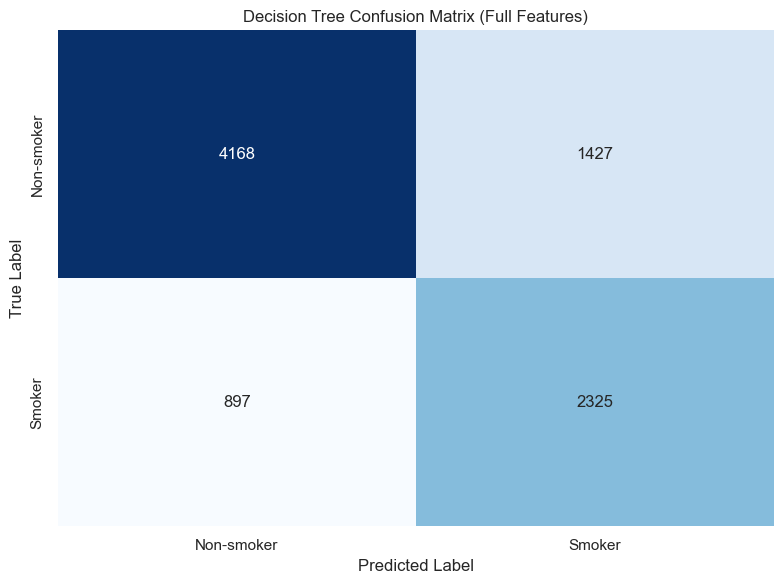

Specificity (True Negative Rate): 0.7450
Negative Predictive Value: 0.8229

Confusion Matrix for Reduced Feature Set:


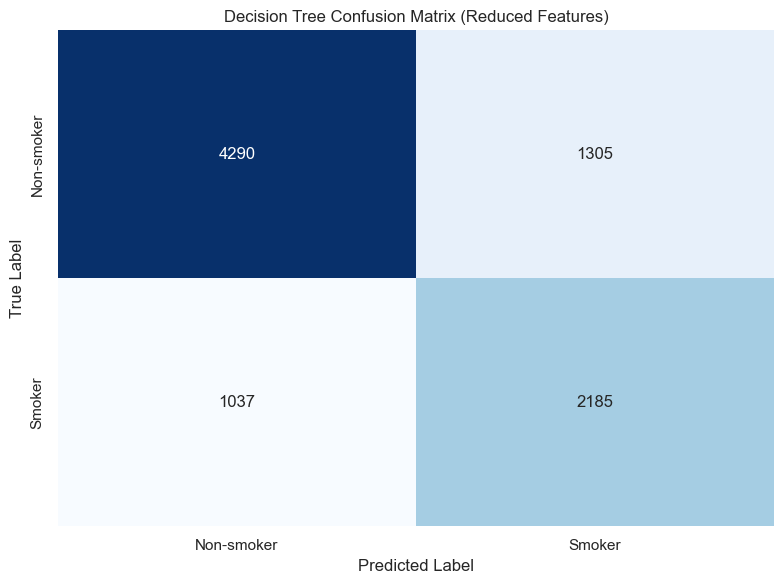

Specificity (True Negative Rate): 0.7668
Negative Predictive Value: 0.8053


In [13]:
# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Non-smoker', 'Smoker'],
               yticklabels=['Non-smoker', 'Smoker'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Calculate and display derived metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # True negative rate
    npv = tn / (tn + fn)  # Negative predictive value
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")

# Function to plot ROC curves
def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Display confusion matrices
print("Confusion Matrix for Full Feature Set:")
plot_confusion_matrix(y_full_test, y_full_pred, 'Decision Tree Confusion Matrix (Full Features)')

print("\nConfusion Matrix for Reduced Feature Set:")
plot_confusion_matrix(y_reduced_test, y_reduced_pred, 'Decision Tree Confusion Matrix (Reduced Features)')

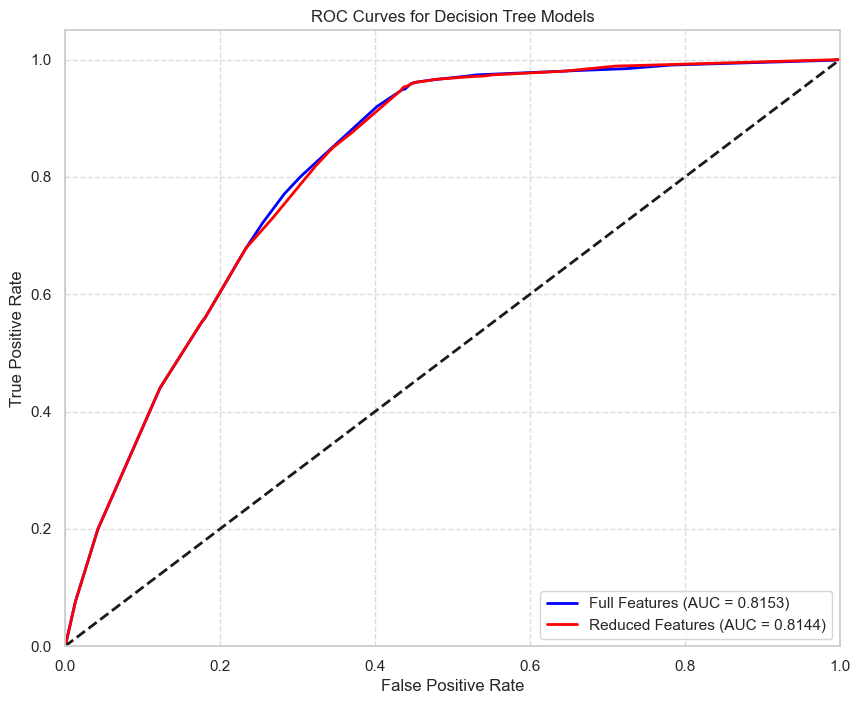

In [14]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for the full feature model
fpr_full, tpr_full, roc_auc_full = plot_roc_curve(y_full_test, y_full_prob, 'Full')
plt.plot(fpr_full, tpr_full, label=f'Full Features (AUC = {roc_auc_full:.4f})', lw=2, color='blue')

# Plot ROC curve for the reduced feature model
fpr_reduced, tpr_reduced, roc_auc_reduced = plot_roc_curve(y_reduced_test, y_reduced_prob, 'Reduced')
plt.plot(fpr_reduced, tpr_reduced, label=f'Reduced Features (AUC = {roc_auc_reduced:.4f})', lw=2, color='red')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Models')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 8. Comparison of Feature Sets

Let's directly compare the performance of our full and reduced feature sets to see how much predictive power we retain with fewer features:

In [15]:
# Create a comparison DataFrame
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Full Features': [
        full_metrics['accuracy'],
        full_metrics['precision'],
        full_metrics['recall'],
        full_metrics['f1_score'],
        full_metrics['roc_auc']
    ],
    'Reduced Features': [
        reduced_metrics['accuracy'],
        reduced_metrics['precision'],
        reduced_metrics['recall'],
        reduced_metrics['f1_score'],
        reduced_metrics['roc_auc']
    ]
})

# Calculate differences and percentage changes
metrics_comparison['Absolute Difference'] = metrics_comparison['Full Features'] - metrics_comparison['Reduced Features']
metrics_comparison['Percentage Change (%)'] = (metrics_comparison['Absolute Difference'] / metrics_comparison['Full Features']) * 100

# Display the comparison
print("Comparison of Decision Tree Performance: Full vs. Reduced Feature Sets")
metrics_comparison.set_index('Metric')

Comparison of Decision Tree Performance: Full vs. Reduced Feature Sets


,Full Features,Reduced Features,Absolute Difference,Percentage Change (%)
Metric,,,,
Accuracy,0.736418,0.734377,0.002042,0.277222
Precision,0.619670,0.626074,-0.006405,-1.033614
Recall,0.721601,0.678150,0.043451,6.021505
F1 Score,0.666762,0.651073,0.015690,2.353096
ROC AUC,0.815335,0.814366,0.000969,0.118869


<Figure size 1200x800 with 0 Axes>

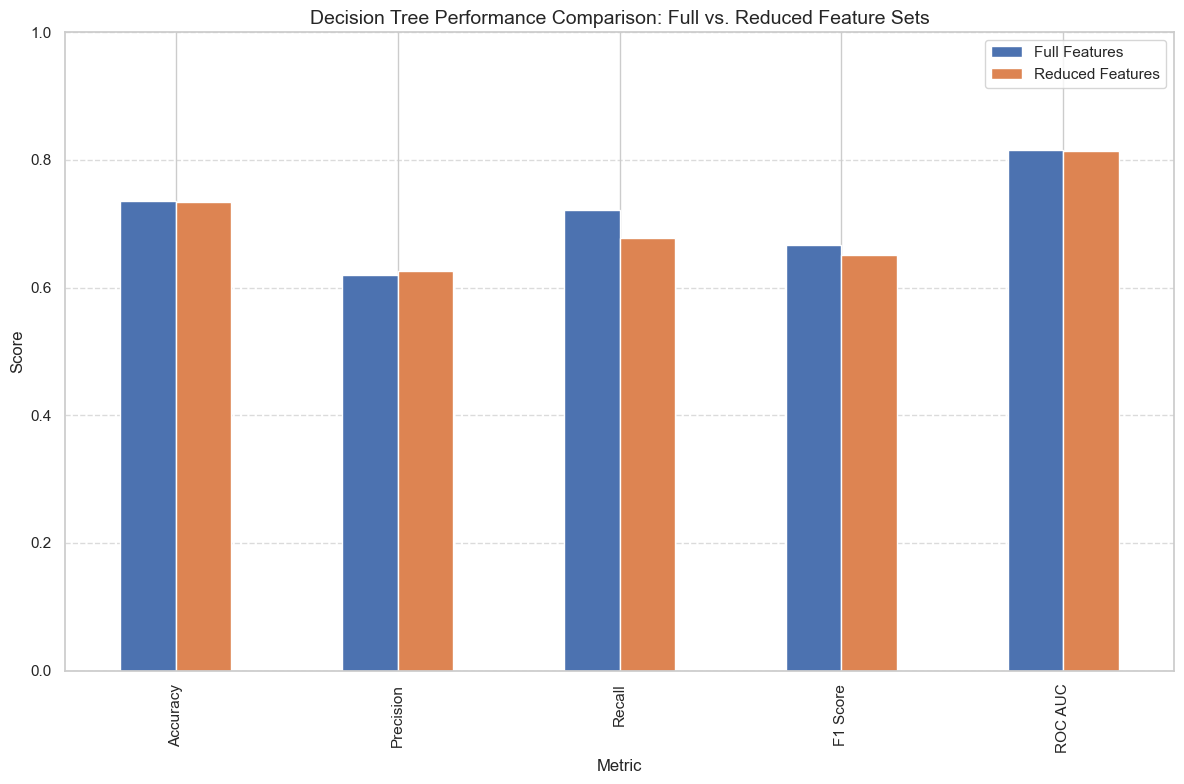

In [16]:
# Visualize the comparison
plt.figure(figsize=(12, 8))
metrics_comparison.set_index('Metric').loc[:, ['Full Features', 'Reduced Features']].plot(kind='bar')
plt.title('Decision Tree Performance Comparison: Full vs. Reduced Feature Sets', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## 9. Save Results for Comparison with Other Models

Let's save our Decision Tree model performance metrics to CSV files for later comparison with other models:

In [17]:
# Create DataFrames for saving results
dt_full_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Feature_Set': ['Full'],
    'Accuracy': [full_metrics['accuracy']],
    'Precision': [full_metrics['precision']],
    'Recall': [full_metrics['recall']],
    'F1_Score': [full_metrics['f1_score']],
    'ROC_AUC': [full_metrics['roc_auc']]
})

dt_reduced_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Feature_Set': ['Reduced'],
    'Accuracy': [reduced_metrics['accuracy']],
    'Precision': [reduced_metrics['precision']],
    'Recall': [reduced_metrics['recall']],
    'F1_Score': [reduced_metrics['f1_score']],
    'ROC_AUC': [reduced_metrics['roc_auc']]
})

# Combine results
dt_results = pd.concat([dt_full_results, dt_reduced_results], ignore_index=True)

# Add hyperparameter information
dt_results['Hyperparameters'] = [
    f"criterion={best_criterion}, max_depth={best_depth}, random_state={best_rs}",
    f"criterion={best_criterion}, max_depth={best_depth}, random_state={best_rs}"
]

# Save results to CSV
dt_results.to_csv('decision_tree_model_results.csv', index=False)
print("Saved Decision Tree model results to decision_tree_model_results.csv")

# Display the final results table
dt_results

Saved Decision Tree model results to decision_tree_model_results.csv


,Model,Feature_Set,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Hyperparameters
0,Decision Tree,Full,0.736418,0.619670,0.721601,0.666762,0.815335,"criterion=gini, max_depth=5, random_state=1"
1,Decision Tree,Reduced,0.734377,0.626074,0.678150,0.651073,0.814366,"criterion=gini, max_depth=5, random_state=1"
